<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Exercicios_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Pandas

## 1. Crie um DataFrame contendo as colunas Produto, Preço e Quantidade com 5 produtos.

In [ ]:
import pandas as pd

dados = {'Produto': ['Teclado', 'Monitor', 'Gabinete', 'Cooler', 'Placa-Mãe'],
         'Preço': [21, 60, 220, 100, 500],
         'Quantidade': [1, 3, 2, 4, 3],
         }

df = pd.DataFrame(dados)
print(df)

     Produto  Preço  Quantidade
0    Teclado     21           1
1    Monitor     60           3
2   Gabinete    220           2
3     Cooler    100           4
4  Placa-Mãe    500           3


## 2. Leia um arquivo Excel chamado vendas.xlsx e exiba as 10 primeiras linhas

In [ ]:
import pandas as pd

df = pd.read_excel('vendas.xlsx')
print(df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'vendas.xlsx'

## 3. Filtre um DataFrame para exibir apenas os valores onde a coluna Preço é maior que 100

In [ ]:
df_filtado = df[df['Preço'] > 100]
print(df_filtado)

     Produto  Preço  Quantidade
2   Gabinete    220           2
4  Placa-Mãe    500           3


## 4. Adicione uma coluna chamada Desconto ao DataFrame com 10% de desconto para todos os produtos

In [ ]:
df['Desconto'] = df['Preço'] * 0.1
print(df)

     Produto  Preço  Quantidade  Desconto
0    Teclado     21           1       2.1
1    Monitor     60           3       6.0
2   Gabinete    220           2      22.0
3     Cooler    100           4      10.0
4  Placa-Mãe    500           3      50.0


## 5. Remova as linhas do DataFrame que contenham valores nulos

In [ ]:
df = df.dropna()
print(df)

     Produto  Preço  Quantidade  Desconto
0    Teclado     21           1       2.1
1    Monitor     60           3       6.0
2   Gabinete    220           2      22.0
3     Cooler    100           4      10.0
4  Placa-Mãe    500           3      50.0


## 6. Ordene o DataFrame pela coluna Produto em ordem alfabética

In [ ]:
df_ordenado = df.sort_values(by='Produto')
print(df_ordenado)

     Produto  Preço  Quantidade  Desconto
3     Cooler    100           4      10.0
2   Gabinete    220           2      22.0
1    Monitor     60           3       6.0
4  Placa-Mãe    500           3      50.0
0    Teclado     21           1       2.1


## 7. Crie uma nova coluna chamada Total que seja o produto entre as colunas Preço e Quantidade

In [ ]:
df['Total'] = df['Preço'] * df['Quantidade']
print(df)

     Produto  Preço  Quantidade  Desconto  Total
0    Teclado     21           1       2.1     21
1    Monitor     60           3       6.0    180
2   Gabinete    220           2      22.0    440
3     Cooler    100           4      10.0    400
4  Placa-Mãe    500           3      50.0   1500


## 8. Agrupe o DataFrame pela coluna Categoria e calcule o total de produtos por categoria

In [ ]:
df['Categoria'] = ['Perifericos-externos', 'Perifericos-externos', 'Perifericos-externos', 'Perifericos-internos', 'Perifericos-internos']

total_produtos = df.groupby('Categoria')['Quantidade'].sum()
print(total_produtos)

Categoria
Perifericos-externos    6
Perifericos-internos    7
Name: Quantidade, dtype: int64


## 9. Exporte o DataFrame resultante para um arquivo CSV chamado resultados.csv

In [ ]:
df.to_csv('resultados.csv', index=False)

## 10. Leia um arquivo CSV, renomeie as colunas e exiba as 5 últimas linhas do DataFrame

In [ ]:
df = pd.read_csv('resultados.csv')
df = df.rename(columns={'Preço': 'Preco2', 'Quantidade': 'Quantidade2', 'Produto': 'Produto2', 'Desconto': 'Desconto2', 'Total': 'Total2', 'Categoria': 'Categoria2'})
print(df.tail(5))

    Produto2  Preco2  Quantidade2  Desconto2  Total2            Categoria2
0    Teclado      21            1        2.1      21  Perifericos-externos
1    Monitor      60            3        6.0     180  Perifericos-externos
2   Gabinete     220            2       22.0     440  Perifericos-externos
3     Cooler     100            4       10.0     400  Perifericos-internos
4  Placa-Mãe     500            3       50.0    1500  Perifericos-internos


## 11. Preencha os valores nulos de uma coluna numérica com a mediana dessa coluna

In [ ]:
df['Quantidade2'] = df['Quantidade2'].fillna(df['Quantidade2'].median())
print(df)

    Produto2  Preco2  Quantidade2  Desconto2  Total2            Categoria2
0    Teclado      21            1        2.1      21  Perifericos-externos
1    Monitor      60            3        6.0     180  Perifericos-externos
2   Gabinete     220            2       22.0     440  Perifericos-externos
3     Cooler     100            4       10.0     400  Perifericos-internos
4  Placa-Mãe     500            3       50.0    1500  Perifericos-internos


## 12. Verifique quais colunas de um DataFrame contêm valores duplicados

In [ ]:
df_duplicado_quant = df[df['Quantidade2'].duplicated()]
df_duplicado_preco = df[df['Preco2'].duplicated()]
df_duplicado_total = df[df['Total2'].duplicated()]
print(f'{df_duplicado_quant}')
print(f'{df_duplicado_preco}')
print(df_duplicado_total)

    Produto2  Preco2  Quantidade2  Desconto2  Total2            Categoria2
4  Placa-Mãe     500            3       50.0    1500  Perifericos-internos
Empty DataFrame
Columns: [Produto2, Preco2, Quantidade2, Desconto2, Total2, Categoria2]
Index: []
Empty DataFrame
Columns: [Produto2, Preco2, Quantidade2, Desconto2, Total2, Categoria2]
Index: []


## 13. Crie uma tabela dinâmica a partir do DataFrame, calculando a soma de Quantidade por Categoria

In [ ]:
pivot_table = pd.pivot_table(df, values='Quantidade2', index='Categoria2', aggfunc='sum')
print(pivot_table)

                      Quantidade2
Categoria2                       
Perifericos-externos            6
Perifericos-internos            7


## 14. Mescle dois DataFrames baseados em uma coluna comum chamada ID utilizando um join

In [ ]:
import pandas as pd

dados = {'ID': 1,
        'Produto': ['Teclado', 'Monitor', 'Gabinete', 'Cooler', 'Placa-Mãe'],
         'Preço': [21, 60, 220, 100, 500],
         'Quantidade': [1, 3, 2, 4, 3],
         }

dados2 = {'ID': 2,
        'Produto': ['Teclado2', 'Monitor2', 'Gabinete2', 'Cooler2', 'Placa-Mãe2'],
         'Preço': [21, 60, 220, 100, 500],
         'Quantidade': [1, 3, 2, 4, 3],
         }

df1 = pd.DataFrame(dados)
df2 = pd.DataFrame(dados2)

df_mesclado = pd.merge(df1, df2, on='ID')
print(df_mesclado)

Empty DataFrame
Columns: [ID, Produto_x, Preço_x, Quantidade_x, Produto_y, Preço_y, Quantidade_y]
Index: []


## 15.  Crie um DataFrame com dados faltantes e use a interpolação linear para preenchê-los

In [ ]:
import pandas as pd
import numpy as np

dados = {'ID': [1, 2, 3, 4, 5],
         'Produto': ['Teclado', 'Monitor', 'Gabinete', 'Cooler', 'Placa-Mãe'],
         'Preço': [21,np.nan , 220, 100, 500],
         'Quantidade': [1, 3, np.nan, 4, 3],
         }

df = pd.DataFrame(dados)

df['Preço'] = df['Preço'].interpolate()
df['Quantidade'] = df['Quantidade'].interpolate()
print(df)

   ID    Produto  Preço  Quantidade
0   1    Teclado   21.0         1.0
1   2    Monitor  120.5         3.0
2   3   Gabinete  220.0         3.5
3   4     Cooler  100.0         4.0
4   5  Placa-Mãe  500.0         3.0


## 16.  Crie um gráfico de barras a partir de um DataFrame usando a biblioteca Pandas

<Axes: xlabel='Nome'>

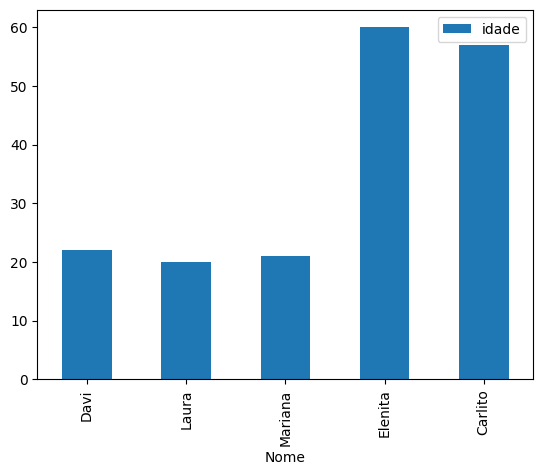

In [ ]:
import pandas as pd

dados = {
    'Nome': ['Davi','Laura','Mariana','Elenita','Carlito'],
    'idade': [22, 20, 21, 60, 57],
    'Sexo': ['M', 'F', 'F', 'F', 'M']
}

df = pd.DataFrame(dados)

df.plot(kind='bar', x='Nome', y='idade')


## 17. Adicione uma coluna ao DataFrame que calcule o imposto (5%) sobre o valor da coluna Total

In [1]:
import pandas as pd

dados = {
    'Eletrodomesticos': ['Celular', 'Geladeira', 'Televisão', 'Microondas', 'Ventilador'],
    'Preço': [1900, 2500, 2100, 800, 150],
    'Quantidade': [2, 1, 2, 1, 4],
}

df = pd.DataFrame(dados)

df['Total'] = df['Preço'] * df['Quantidade']
df['Imposto'] = df['Total'] * 0.05
print(df)

  Eletrodomesticos  Preço  Quantidade  Total  Imposto
0          Celular   1900           2   3800    190.0
1        Geladeira   2500           1   2500    125.0
2        Televisão   2100           2   4200    210.0
3       Microondas    800           1    800     40.0
4       Ventilador    150           4    600     30.0


## 18. Exiba apenas as linhas de um DataFrame onde o nome do produto começa com a letra ”B”

In [6]:
nome_filtrado = df[df['Eletrodomesticos'].str.startswith('B')]
print(nome_filtrado)

Empty DataFrame
Columns: [Eletrodomesticos, Preço, Quantidade, Total, Imposto]
Index: []


## 19. Crie um DataFrame a partir de um dicionário de listas e calcule a média de cada coluna numérica

In [7]:
dados = {'Nome': ['Davi','Laura','Mariana','Elenita','Carlito'],
    'idade': [22, 20, 21, 60, 57],
    'Sexo': ['M', 'F', 'F', 'F', 'M']
}

df = pd.DataFrame(dados)

media_idade = df['idade'].mean()
print(media_idade)

36.0


## 20. Agrupe os dados por uma coluna categórica e calcule a mediana de uma coluna numérica

In [8]:
import pandas as pd

dados = {
    'Eletrodomesticos': ['Celular', 'Geladeira', 'Televisão', 'Microondas', 'Ventilador'],
    'Preço': [1900, 2500, 2100, 800, 150],
    'Quantidade': [2, 1, 2, 1, 4],
}

df = pd.DataFrame(dados)

df['Categoria'] = ['Eletronico', 'Eletrodomestico', 'Eletrodomestico', 'Eletrodomestico', 'Eletrodomestico']

mediana_preco = df.groupby('Categoria')['Preço'].median()
mediana_quantidade = df.groupby('Categoria')['Quantidade'].median()
print(mediana_preco)
print(mediana_quantidade)

Categoria
Eletrodomestico    1450.0
Eletronico         1900.0
Name: Preço, dtype: float64
Categoria
Eletrodomestico    1.5
Eletronico         2.0
Name: Quantidade, dtype: float64
